In [ ]:
#diffusers is a hugging face page for using diffusion models from hugging face hub
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.1 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
!pip show torch

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """homemade cake sitting on a rustic wooden table. The cake should be decorated with swirls of frosting and topped with colorful sprinkles. Surrounding the cake, there should be fresh berries and mint leaves scattered on the table. The lighting should be warm and inviting, with soft shadows adding depth to the scene.
"""

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  homemade cake sitting on a rustic wooden table. The cake should be decorated with swirls of frosting and topped with colorful sprinkles. Surrounding the cake, there should be fresh berries and mint leaves scattered on the table. The lighting should be warm and inviting, with soft shadows adding depth to the scene.



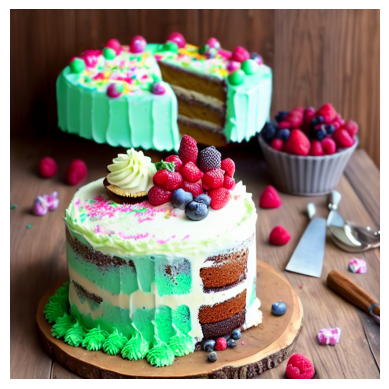

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt2 = """a decadent chocolate cake placed on a vintage cake stand. The cake should be rich and moist, with layers of dark chocolate ganache in between. It should be generously frosted with glossy chocolate icing, with drips of chocolate cascading down the sides. On top of the cake, there should be a sprinkling of chocolate shavings and curls for added texture and elegance.
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  a decadent chocolate cake placed on a vintage cake stand. The cake should be rich and moist, with layers of dark chocolate ganache in between. It should be generously frosted with glossy chocolate icing, with drips of chocolate cascading down the sides. On top of the cake, there should be a sprinkling of chocolate shavings and curls for added texture and elegance.



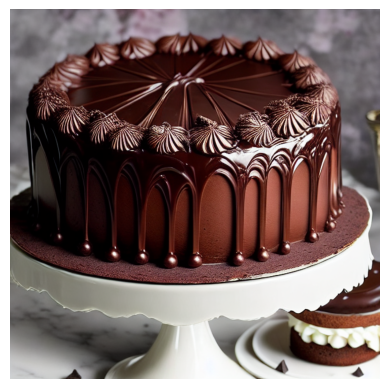

In [ ]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt3 = """a whimsical three-layer birthday cake, adorned with all the colors of the rainbow and decorated with a magical unicorn theme. Each layer of the cake should be a different pastel color, with swirls of vibrant frosting between them. The top of the cake should feature a fondant unicorn figurine, with a flowing mane of rainbow colors and a golden horn. Surrounding the unicorn, there should be edible glitter and shimmering sprinkles, creating a sparkling effect.
"""

image = pipe(prompt3).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (91 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['should be edible glitter and shimmering sprinkles, creating a sparkling effect.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  a whimsical three-layer birthday cake, adorned with all the colors of the rainbow and decorated with a magical unicorn theme. Each layer of the cake should be a different pastel color, with swirls of vibrant frosting between them. The top of the cake should feature a fondant unicorn figurine, with a flowing mane of rainbow colors and a golden horn. Surrounding the unicorn, there should be edible glitter and shimmering sprinkles, creating a sparkling effect.



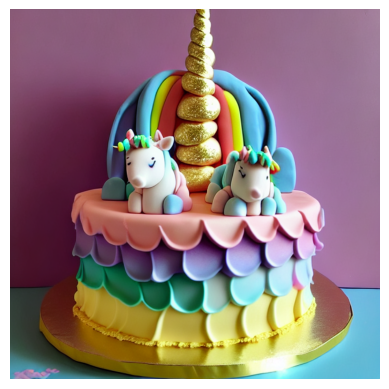

In [ ]:
print('[PROMPT]: ',prompt3)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt4 ="""a picturesque village nestled in a lush countryside landscape. The village should be comprised of quaint cottages with thatched roofs, colorful facades, and flower-filled window boxes. Narrow cobblestone streets wind their way through the village, lined with ancient oak trees and stone walls draped in ivy. In the center of the village, there's a charming town square with a bubbling fountain surrounded by benches where villagers gather to chat and children play."""



In [ ]:
image = pipe(prompt4).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fountain surrounded by benches where villagers gather to chat and children play.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  a picturesque village nestled in a lush countryside landscape. The village should be comprised of quaint cottages with thatched roofs, colorful facades, and flower-filled window boxes. Narrow cobblestone streets wind their way through the village, lined with ancient oak trees and stone walls draped in ivy. In the center of the village, there's a charming town square with a bubbling fountain surrounded by benches where villagers gather to chat and children play.


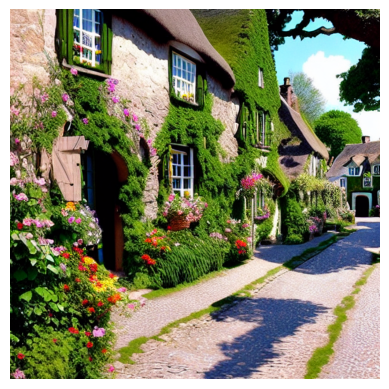

In [ ]:
print('[PROMPT]: ',prompt4)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt5 = """a gourmet burger, piled high with juicy ingredients and nestled between two toasted buns. The burger should feature a thick, perfectly grilled beef patty cooked to perfection, topped with melted cheese that oozes over the sides. Surrounding the patty, there should be crisp lettuce, ripe tomatoes, and slices of crunchy pickles, adding freshness and texture to the ensemble. Drizzle a generous amount of savory sauce over the top, such as tangy barbecue sauce or creamy aioli, to enhance the flavors. Finally, crown the burger with a sesame seed bun, lightly toasted to golden perfection. """

In [ ]:
image = pipe(prompt5).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sauce over the top, such as tangy barbecue sauce or creamy aioli, to enhance the flavors. finally, crown the burger with a sesame seed bun, lightly toasted to golden perfection.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  a picturesque village nestled in a lush countryside landscape. The village should be comprised of quaint cottages with thatched roofs, colorful facades, and flower-filled window boxes. Narrow cobblestone streets wind their way through the village, lined with ancient oak trees and stone walls draped in ivy. In the center of the village, there's a charming town square with a bubbling fountain surrounded by benches where villagers gather to chat and children play.


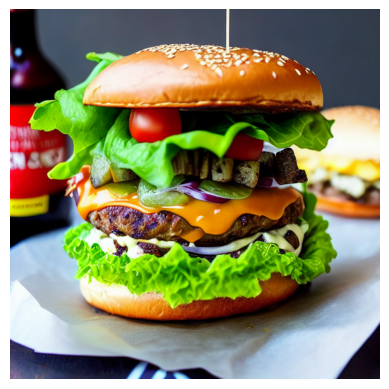

In [ ]:
print('[PROMPT]: ',prompt4)
plt.imshow(image);
plt.axis('off');

Creating an interface

In [ ]:
def generate_image_interface(prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, }

  img = pipe(**params).images
  return img[0],img[1]

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB/

In [ ]:
import gradio as gr

In [ ]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:961: UserWarning: Expected maximum 3 arguments for function <function generate_image_interface at 0x7bea984ac820>, received 4.
  warnings.warn(


In [ ]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ed7bca35bfee05308.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
